In [147]:
from matplotlib import pyplot as plt
import pandas as pd
import math
import numpy as np

In [148]:
Xand= pd.DataFrame([[1,1,1],[0,1,0],[1,0,0],[0,0,0]])

In [149]:
Xand

,0,1,2
0,1,1,1
1,0,1,0
2,1,0,0
3,0,0,0


In [327]:
Y=Xand.iloc[:,2]
X=Xand.iloc[:,[0,1]]
# add a collone of ones to X to become X1 :
X1=np.hstack((np.ones( ( len(X), 1) ),X)) 

## La fontction hTheta qui caclule le produit scalaire de X*W

In [351]:
def hTheta(Xi,W) :
    z=np.dot(np.array(W).T,Xi)    
    res=1/(1+math.exp(-z))
    return res

In [352]:
# tester le fonctionnemnt de hTheta :
hTheta([1,1,1],X1[0])

0.9525741268224334

# La fonction gradient :

In [353]:
def gradient(X,Y,alpha,W,j) :
    res=0
    for i in range(X.shape[0]):
        res+=(Y[i]-hTheta(X[i],W))*X[i][j]
    return res

In [354]:
# tester la foction gradient de gradient :
gradient(X1,Y,0.2,W,0)

-0.1623386790312694

# Cette fonction permet de  mettre à jour les parametres de W : 

In [355]:
def miseajour(X,Y,W,j,alpha,omega) :
    return omega+alpha*gradient(X,Y,alpha,W,j)

In [356]:
# tester la fonction miseajour :
miseajour(X1,Y,W,2,0.2,1)

1.0220788851732652

# La fonxtion descent pour optimiser les parametres de W :

In [357]:
def descent(X,Y,W,alpha,NMax) : 
    #itérer sur les coefficient de W : 
    for j in range(NMax) :
    # itérer sur le nombre des itérations donné en argument :
        for i in range(len(W)) :
            W[i]=miseajour(X,Y,W,i,alpha,W[i])
    return W

# Le programme principale : 

In [358]:
# initialiser les prametres de W
W=[1,1,1]
print(W)
# donner une valeur a alpha
alpha=0.1
# présiser le nombre des itérations :
NMax=100
# recupérer les meilleurs parametres de W retournés par la fonction descant :
WBest=descent(X1,Y,W,alpha,NMax)
WBest

[1, 1, 1]


[-3.1055033570454245, 1.896357903921264, 1.8823581144485788]

# La fonction qui calcule l'erreur :

In [359]:
def Error(X,Y,W) :
    somme = 0
    m=X.shape[0]
    for i in range(m):
        somme+=Y[i]*np.log(hTheta(X[i],W))+(1-Y[i])*np.log(1-hTheta(X[i],W))
    return somme*(-1/m)

In [360]:
#tester la fonction d'erreur pour W pris au debut et le meilleur W :
print("l'erreur pour W pris au debut est ---->"+str(Error(X1,Y,[1,1,1])))
print("l'erreur pour le meilleur W est ---->"+str(Error(X1,Y,WBest)))

l'erreur pour W pris au debut est ---->1.4039262652944768
l'erreur pour le meilleur W est ---->0.2437817184604208


0.6622221541474287
0.22738341998624562
0.22985228810113734
0.04288081679645774


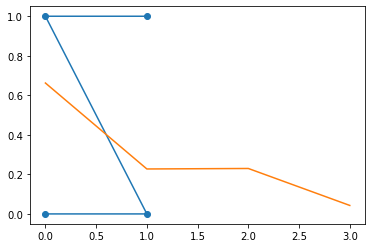

In [369]:
# plt.scatter(X.iloc[:,0],X.iloc[:,1],Y)
plt.scatter(X.iloc[:,0],X.iloc[:,1])
Ypred=[]
for i in range( X1.shape[0]) : 
    print(hTheta(X1[i],WBest))
    Ypred.append(hTheta(X1[i],WBest))
plt.plot(X.iloc[:,0],X.iloc[:,1],Ypred)